# Clasificación de Niveles de Riesgo de Calidad del Aire

Para clasificar los niveles de riesgo de la calidad del aire en las categorías de **Bajo**, **Moderado** y **Alto**, es fundamental establecer umbrales basados en las concentraciones de los contaminantes presentes. A continuación, se detallan los contaminantes y sus respectivos umbrales según las **Directrices Mundiales de la OMS sobre la Calidad del Aire** y otras fuentes reconocidas:

### 1. Monóxido de Carbono (CO)
- **Umbrales según la OMS**:
  - Promedio de 24 horas: 7 mg/m³ (7000 µg/m³)
  - Promedio de 8 horas: 10 mg/m³ (10000 µg/m³)
- **Nota**: Los valores en el conjunto de datos están en µg/m³.

### 2. Dióxido de Nitrógeno (NO₂)
- **Umbrales según la OMS**:
  - Promedio anual: 10 µg/m³
  - Promedio de 24 horas: 25 µg/m³

### 3. Óxidos de Nitrógeno (NOx)
- **Referencias**:
  - No hay un umbral específico establecido por la OMS para NOx en conjunto.
  - Sin embargo, se considera que concentraciones elevadas de NOx pueden ser perjudiciales para la salud.

### 4. Benceno (C₆H₆)
- **Umbrales según la OMS**:
  - La OMS indica que no existe un nivel seguro de exposición al benceno y recomienda minimizar la exposición tanto como sea posible.

### 5. Hidrocarburos No Metánicos (NMHC)
- **Referencias**:
  - No hay umbrales específicos establecidos por la OMS para NMHC.
  - Sin embargo, niveles elevados pueden contribuir a la formación de ozono troposférico y afectar la salud.

### 6. Sensores de Calidad del Aire (PT08.S1 a PT08.S5)
- **Referencias**:
  - Estos son valores de sensores específicos y no corresponden directamente a concentraciones estándar de contaminantes.
  - Se recomienda calibrar estos sensores con datos de referencia para establecer umbrales adecuados.


### Referencias

1. **Organización Mundial de la Salud (OMS)**. Directrices Mundiales de la OMS sobre la Calidad del Aire 2021. Disponible en: [OMS - Calidad del Aire](https://www.who.int/news-room/fact-sheets/detail/ambient-(outdoor)-air-quality-and-health)

2. **United States Environmental Protection Agency (EPA)**. Standards for Carbon Monoxide (CO), Nitrogen Dioxide (NO2), and Benzene (C6H6). Disponible en: [EPA - Air Quality Standards](https://www.epa.gov/)

3. **Air Quality Guidelines** - European Union (UE) Directive 2008/50/EC on Ambient Air Quality. Disponible en: [EU Ambient Air Quality Standards](https://eur-lex.europa.eu/legal-content/EN/TXT/?uri=celex:32008L0050)

4. **Environmental Canada**. National Ambient Air Quality Objectives. Disponible en: [Environment and Climate Change Canada](https://www.canada.ca/en/environment-climate-change.html)

## Propuesta de Clasificación de Riesgo

Basándonos en los umbrales mencionados, se propone la siguiente clasificación de riesgo para cada contaminante:

### Monóxido de Carbono (CO)

- **Bajo**: CO < 2 µg/m³
- **Moderado**: 2 µg/m³ ≤ CO < 6 µg/m³
- **Alto**: CO ≥ 6 µg/m³

### Dióxido de Nitrógeno (NO₂)

- **Bajo**: NO₂ < 50 µg/m³
- **Moderado**: 50 µg/m³ ≤ NO₂ < 100 µg/m³
- **Alto**: NO₂ ≥ 100 µg/m³

### Óxidos de Nitrógeno (NOx)

- **Bajo**: NOx < 100 µg/m³
- **Moderado**: 100 µg/m³ ≤ NOx < 300 µg/m³
- **Alto**: NOx ≥ 300 µg/m³

### Benceno (C₆H₆)

- **Bajo**: C₆H₆ < 5 µg/m³
- **Moderado**: 5 µg/m³ ≤ C₆H₆ < 15 µg/m³
- **Alto**: C₆H₆ ≥ 15 µg/m³

### Hidrocarburos No Metánicos (NMHC)

- **Bajo**: NMHC < 500 µg/m³
- **Moderado**: 500 µg/m³ ≤ NMHC < 1500 µg/m³
- **Alto**: NMHC ≥ 1500 µg/m³

## Estrategia de Clasificación General de Riesgo
El nivel de riesgo general de un registro se determina en función de la frecuencia del nivel de riesgo entre todos los contaminantes:

- **Bajo**: La mayoría de los contaminantes están en nivel Bajo.
- **Moderado**: La mayoría de los contaminantes están en nivel Moderado o hay una mezcla significativa de niveles Bajo y Moderado.
- **Alto**: Uno o más contaminantes están en nivel Alto, o si la mayoría están en nivel Moderado.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Impoirtar datos limpios
df = pd.read_csv("../data/data_clean.csv", sep=',')

In [6]:
def asignar_puntuacion(valor, bajo, moderado):
    if valor < bajo:
        return 1  # Bajo
    elif bajo <= valor < moderado:
        return 2  # Moderado
    else:
        return 3  # Alto

# Asignar puntuación basada en los umbrales para cada contaminante
df['CO_score'] = df['CO(GT)'].apply(asignar_puntuacion, args=(2, 6))
df['NO2_score'] = df['NO2(GT)'].apply(asignar_puntuacion, args=(50, 100))
df['NOx_score'] = df['NOx(GT)'].apply(asignar_puntuacion, args=(100, 300))
df['C6H6_score'] = df['C6H6(GT)'].apply(asignar_puntuacion, args=(5, 15))
df['NMHC_score'] = df['PT08.S2(NMHC)'].apply(asignar_puntuacion, args=(500, 1500))

In [16]:
# Función para asignar el nivel de riesgo general basado en la regla de mayoría
def clasificar_por_mayoria(row):
    # Contar cuántos contaminantes están en cada nivel de riesgo
    bajo = [row['CO_score'], row['NO2_score'], row['NOx_score'], row['C6H6_score'], row['NMHC_score']].count(1)
    moderado = [row['CO_score'], row['NO2_score'], row['NOx_score'], row['C6H6_score'], row['NMHC_score']].count(2)
    alto = [row['CO_score'], row['NO2_score'], row['NOx_score'], row['C6H6_score'], row['NMHC_score']].count(3)
    
    # Asignar el nivel de riesgo general basado en la mayoría
    if alto >= 1:  
        return 'Alto'
    elif moderado >= 2:
        return 'Moderado'
    else:
        return 'Bajo'

df['Riesgo'] = df.apply(clasificar_por_mayoria, axis=1)

In [8]:
print(df['Riesgo'].value_counts())

Riesgo
Alto        6315
Moderado    2514
Bajo         528
Name: count, dtype: int64


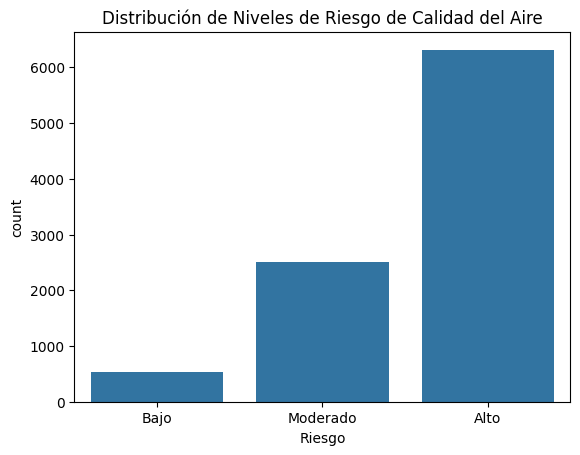

In [11]:
# Visualizar la distribución de las etiquetas de riesgo
sns.countplot(x='Riesgo', data=df, order=['Bajo', 'Moderado', 'Alto'])
plt.title('Distribución de Niveles de Riesgo de Calidad del Aire')
plt.show()

## Estructurar df etiquetado

In [17]:
columnas_a_eliminar = ['Date', 'Time', 'CO_score', 'NO2_score', 'NOx_score', 'C6H6_score', 'NMHC_score']

# Crear un nuevo DataFrame sin las columnas especificadas
df_final = df.drop(columns=columnas_a_eliminar, errors='ignore').copy()

df_final.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Riesgo
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,Alto
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,Moderado
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,Alto
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,Alto
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,Alto


In [ ]:
# Exportar csv
df_final.to_csv('../data/data_labeled.csv', index=False)